Init Plugin
7
Init Graph Optimizer
Init Kernel
           b         m         MSE    dMSE_db     dMSE_dm
0   0.000000  0.500000  209.678571 -26.428571 -104.142857
1   0.264286  1.541429  111.067852 -18.758776  -73.765714
2   0.451873  2.279086   61.581643 -13.325380  -52.246517
3   0.585127  2.801551   36.747741  -9.476254  -37.002303
4   0.679890  3.171574   24.285184  -6.749428  -26.203300
..       ...       ...         ...        ...         ...
95  1.008686  4.045610   11.718957  -0.098447    0.024855
96  1.009671  4.045361   11.718854  -0.098183    0.024789
97  1.010653  4.045113   11.718752  -0.097919    0.024722
98  1.011632  4.044866   11.718650  -0.097656    0.024655
99  1.012608  4.044619   11.718549  -0.097393    0.024589

[100 rows x 5 columns]


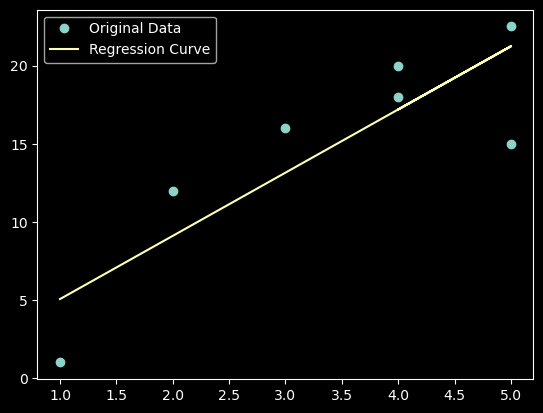

In [1]:
### IMPORT
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns #for colors 
colors=sns.light_palette('seagreen', 3) 
plt.style.use('dark_background') # for customizing theme

import tensorflow as tf
from tensorflow import keras

#data 
[xs, ys] = [[1,2,3,4,5,4,5] , [1, 12, 16, 18, 22.5, 20, 15]] 

#Hyperparameter
Learning_rate = 0.01 
epochs = range(0,100) 

#Starting Values: 
prev_db = 0;  dMSE_db = 0; 
b = 0; m = 0.5 #Gewichte sind ungleich 0

#Variables
y_regression = [] 
prev_MSE = 0
liste=[]
column_names = ['b', 'm', 'MSE', 'dMSE_db', 'dMSE_dm']

#Funktionen
def linear_function (X, M, B): 
    Y=M*float(X)+B 
    return Y

for k in epochs:
    dMSE_db = 0
    dMSE_dm = 0
    MSE = 0
    for i in range(0,len(xs)): 
        dMSE_db = dMSE_db - 2/len(xs) * (ys[i] - m*xs[i] - b)
        dMSE_dm = dMSE_dm - 2*xs[i]/len(xs) * (ys[i] - m*xs[i] - b)   
        y = linear_function(xs[i], m, b) 
        MSE=MSE + 1/len(xs)*(y-ys[i])**2

    new_row = [b, m, MSE,  dMSE_db, dMSE_dm]
    liste.append(new_row) 

    Stepsize_b = Learning_rate * dMSE_db #dmse_db ist zu klein 
    b = b - Stepsize_b
    Stepsize_m = Learning_rate * dMSE_dm #dmse_db ist zu klein 
    m = m - Stepsize_m    

print(len(xs))
df=pd.DataFrame(liste, columns=column_names)
print(df)

### PLOTTEN ### 

plt.plot(xs, ys, 'o', label="Original Data") 
for i in range(0,len(xs)): 
    y_regression.append(linear_function(xs[i], m, b)) 
plt.plot(xs, y_regression, label="Regression Curve") 
plt.legend() 
plt.show()

### Hier gibt es keinen Optimizer der die Funktion zum Minimum führt. Bam. Den müsste ich als nächstes programmieren. 

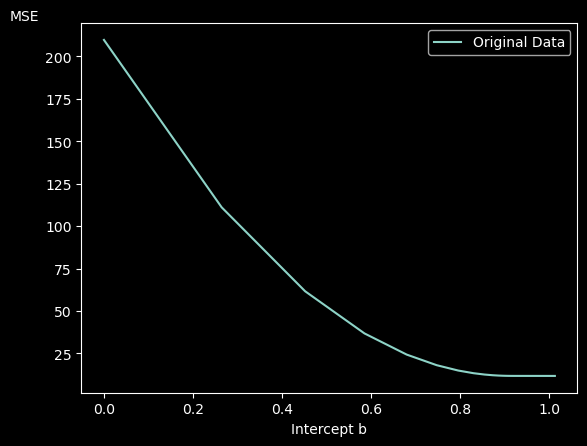

In [2]:
### MSE über b PLOTTEN ### 

plt.plot(list(df['b']), list(df['MSE']) , label="Original Data")
plt.xlabel('Intercept b', loc='center')
plt.ylabel('MSE', rotation=0, loc='top') 
plt.legend() 
plt.show()

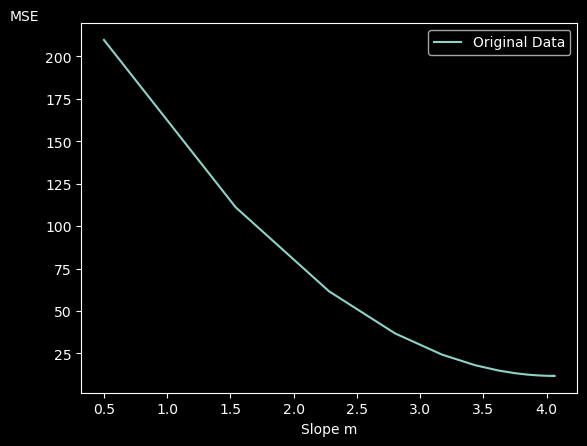

In [3]:
### MSE über m PLOTTEN ### 

plt.plot(list(df['m']), list(df['MSE']), label="Original Data")
plt.legend() 
plt.xlabel('Slope m', loc='center')
plt.ylabel('MSE', rotation=0, loc='top')
plt.show()

In [4]:
### NORMALIZATION manuell coden ###

print('Dataset: {}'. format([xs, ys]))
dict = {'xs' : xs, 'ys' : ys}
df = pd.DataFrame(data=dict) 
print(df.head())

mean_x = df['xs'].sum() / df['xs'].count()
print('\nMittelwert von x = {}\n'.format(mean_x))

mean_y = df['ys'].sum() / df['ys'].count()
print('\nMittelwert von y = {}\n'.format(mean_y))

### Put data in range (0,1)

def normalize (df):
    for i in range(0,len(df.columns)):

        ### Select column
        one_column = df[df.columns[i]]

        ### Apply function to values
        norm_column = one_column.apply(lambda i : (i - min(one_column))/(max(one_column) - min(one_column)))
        
        ### Define Column name
        norm_column.name=norm_column.name+'_norm'

        ### Add column to df
        df = pd.concat([df, norm_column], axis=1)

    return df

df_norm = normalize(df)
print(df_norm)

mean_x_norm = df_norm['xs_norm'].sum() / df_norm['xs_norm'].count()
print('\nMittelwert von x_norm = {}'.format(mean_x_norm))

mean_y_norm = df_norm['ys_norm'].sum() / df_norm['ys_norm'].count()
print('\nMittelwert von y_norm = {}'.format(mean_y_norm))



Dataset: [[1, 2, 3, 4, 5, 4, 5], [1, 12, 16, 18, 22.5, 20, 15]]
   xs    ys
0   1   1.0
1   2  12.0
2   3  16.0
3   4  18.0
4   5  22.5

Mittelwert von x = 3.4285714285714284


Mittelwert von y = 14.928571428571429

   xs    ys  xs_norm   ys_norm
0   1   1.0     0.00  0.000000
1   2  12.0     0.25  0.511628
2   3  16.0     0.50  0.697674
3   4  18.0     0.75  0.790698
4   5  22.5     1.00  1.000000
5   4  20.0     0.75  0.883721
6   5  15.0     1.00  0.651163

Mittelwert von x_norm = 0.6071428571428571

Mittelwert von y_norm = 0.6478405315614618


In [5]:
### Normalization (mit Standardization) mit Tensorflow

# split feature and label
df_xs = np.array(df['xs'])

# Normalization is a layer in the Neural Network
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=[1,], axis=None) 

# Mean and Variance
normalizer.adapt(df_xs)
### hier werden der Mittelwert (mean) und Varianz (variance) berechnet
### später werden dann mit normalizer(train_features) die einzelnen Werte mit x_norm = (x - mean) / sqrt(variance) als dataframe ausgeben

print(normalizer.mean.numpy()) 
print(normalizer.variance.numpy()) # VARIANCE = (Standard Deviation)^2

### Testausgabe
first = np.array(df_xs[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy()) 


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-08-18 15:37:03.198045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-18 15:37:03.198159: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-08-18 15:37:03.228260: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-08-18 15:37:03.228671: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-18 15:37:03.276018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-08-18 15:37:03.288681: I tensorflow/core/grappler/

3.4285717
1.9591838
First example: [1]

Normalized: [[-1.74]]


In [6]:
### Model Normalized

model_norm = tf.keras.Sequential([normalizer, keras.layers.Dense(units=1, input_shape=[1])])

model_norm.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [7]:
model_norm.compile(optimizer='sgd', loss='mean_squared_error')

# The model will make a guess like y = 5x + 5 to match the results (optimizer function)
# The model will evaluate how good or bad the function is by (loss function) 
# Then the model will make another guess again 

history_norm = model_norm.fit(np.array(xs), np.array(ys), epochs=100, verbose=0, validation_split=0.2)
# verbose=0 uppresses logging.

hist_norm = pd.DataFrame(history_norm.history)
hist_norm['epoch'] = history_norm.epoch #wird nicht gebraucht unbedingt
hist_norm.head()

2023-08-18 15:37:03.536356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-08-18 15:37:03.613231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


,loss,val_loss,epoch
0,5.0,2.0,0
1,5.0,2.0,1
2,5.0,2.0,2
3,5.0,2.0,3
4,5.0,2.0,4


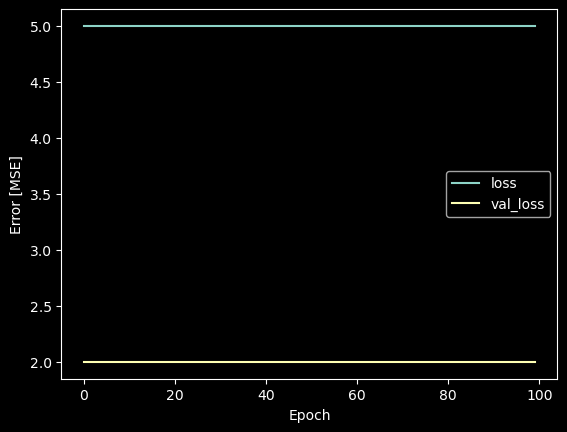

In [8]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss') # Als X-Werte werden automatisch die Indexes definiert, wa. 
  plt.plot(history.history['val_loss'], label='val_loss')

  plt.xlabel('Epoch')
  plt.ylabel('Error [MSE]')
  plt.legend()


plot_loss(history_norm)

### nicht vergessen Datensatz ist super klein val_loss macht garkeinen Sinn hier

In [9]:
### Leeres Modell
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.999, beta_2=0.999, epsilon=1e-07, name='Adam')

model.compile(optimizer='sgd', loss='mean_squared_error')

# The model will make a guess like y = 5x + 5 to match the results (optimizer function)
# The model will evaluate how good or bad the function is by (loss function) 
# Then the model will make another guess again 

history = model.fit(xs, ys, epochs=100, verbose=0)
# verbose=0 uppresses logging.

hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch #wird nicht gebraucht unbedingt
hist.tail()

# Making a guess 500 times
# Hammer: Das ist numerische Mathematik. Und das gefällt mir gut. 
# Es wird y = 3x + 1 nicht exakt bestimmt aber mit einem bestimmten  mean_squared_error schon 

2023-08-18 15:37:04.951054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


,loss
95,7.0
96,7.0
97,7.0
98,7.0
99,7.0


Sxx = 13.714285714285715
Syy = 296.2142857142857
Sxy = 54.214285714285715

MSE = 11.699776785714285


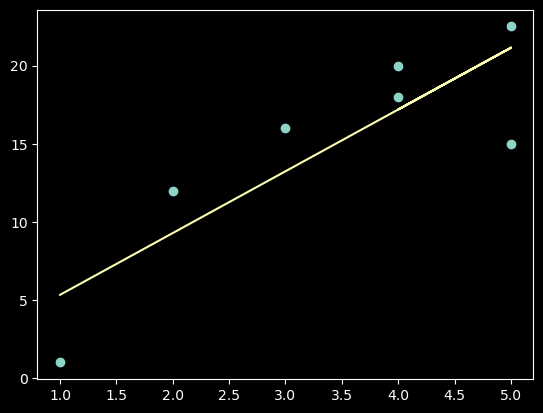

In [10]:
### ADD Correct Regression

x_values, y_values = xs, ys

### Sxx bzw. Syy berechnen 
def CalcSxx (liste): 
    ### Mittelwert berechnen von X-Werten
    i_ = sum(liste)/len(liste) 
    ### Tabelle um Regressionsgerade zu berechnen
    columns = ['x', 'x-x_', '(x-x_)^2'] 
    table = [] 

    for i in liste: 
        # print('Für x = {} und x - x_ = {} gilt die quadratische Abweichung: {}'.format(i, i-i_, (i - i_)**2)
        table.append([i, i-i_,(i - i_)**2]) 

    np_array = np.array(table) # aus liste machen wir array 
    df = pd.DataFrame(np_array, columns=columns) 
    Sxx = sum(df['(x-x_)^2']) 
    return i_, Sxx, df # Weird hier scheint die Reihenfolge wichtig zu sein 

### Print Sxx / Syy ###
x_, Sxx, df_x = CalcSxx(x_values) 
fuck, Syy, df_y = CalcSxx(y_values) 
print('Sxx = {}'.format(Sxx)) 
print('Syy = {}'.format(Syy)) 

### Sxy berechnen
df2 = pd.concat([df_x['x-x_'], df_y['x-x_']], axis=1)
df2.columns=['x-x_', 'y-y_'] # rename columns
df2['Values'] = df2['x-x_'] * df2['y-y_'] # mnultiply rows
Sxy = sum(df2['Values']) 

### Print Sxy ###
print('Sxy = {}\n'.format(Sxy)) 
### ------------------- ###

### Berechnung der Geraden
M = Sxy / Sxx ; B = fuck - M * x_ 

def linear_gradient (X): 
    y=M*float(X)+B 
    return y 

### MEAN SQUARE ERROR ### mse = 1/n * (y_ - y)**2 # Jeder Datenpunkt wird durchgegangen y_ - y
MSE = 0 
for i in range(0,len(x_values)): 
    #print('Y-Wert real = {} and forecast = {}'.format(y_values[i], linear_gradient(x_values[i])))
    MSE=MSE+1/len(x_values)*((linear_gradient(x_values[i])-y_values[i]))**2 
print('MSE = {}'.format(MSE)) 

### PLOTTEN ### 
x_regression = [] ; y_regression_correct = [] 
for i in range(0,len(x_values)): 
    y_regression_correct.append(linear_gradient(x_values[i])) 

colors=sns.light_palette('seagreen', 3) 
plt.style.use('dark_background') # for customizing theme
plt.plot(x_values, y_values, 'o', label="Original Data") 
plt.plot(x_values, y_regression_correct, label="Regression Curve") 



2023-08-18 15:37:06.077193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-08-18 15:37:06.107934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


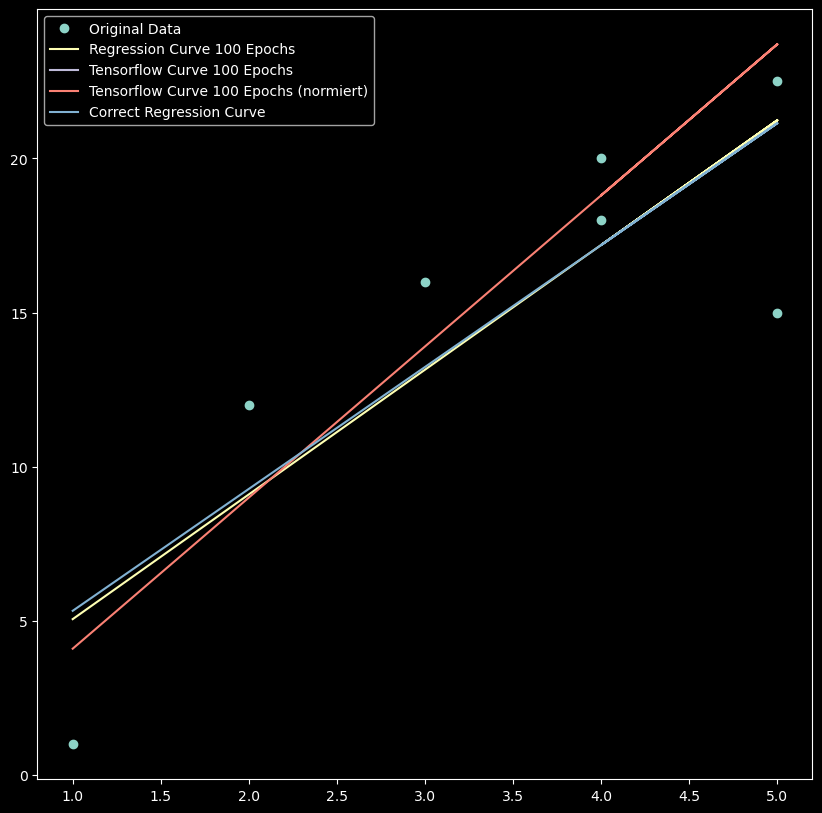

In [11]:
y_tensorflow = model.predict(xs) 
y_tensorflow_norm = model_norm.predict(xs) #normierte Werte

### PLOTTEN ### 
fig = plt.figure(figsize=(10, 10)) # width, height
plt.plot(xs, ys, 'o', label="Original Data")  
plt.plot(xs, y_regression, label="Regression Curve 100 Epochs")
plt.plot(xs, y_tensorflow, label='Tensorflow Curve 100 Epochs')
plt.plot(xs, y_tensorflow_norm, label='Tensorflow Curve 100 Epochs (normiert)')
plt.plot(x_values, y_regression_correct, label="Correct Regression Curve") 
plt.legend()
plt.show() 
